In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

# **Importing Data**

In [51]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/heart+disease_dataset/processed.cleveland.data',header=None)

In [52]:
##First five rows of data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [53]:
##Changing the column names
df.columns=['age',
            'sex',
            'cp',
            'restbp',
            'chol',
            'fbs',
            'restecg',
            'thalach',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal',
            'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# **Idenifying Missing Data**

In [54]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

**ca** and **thal** columns have object data types. Thus, they seems to have mixture of things with different data types.

In [55]:
#Investigating unique values
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [56]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

# **Dealing With Missing Data**

In [57]:
## How many missing data are there?
len(df.loc[(df['ca']=='?')
           |
            (df['thal']=='?')])

6

Six rows have missing data.

In [58]:
##Which smaples have missing data?
df.loc[(df['ca']=='?')
           |
            (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [59]:
len(df)

303

6 of the 303 rows contain missing values which is also equal to 2%. Therefore, removing the missing data doesnt change much of the dataset.

In [60]:
##Saving the samples with no missing values
df_no_missing= df.loc[(df['ca']!='?')
                      &
                     (df['thal']!='?')]

In [61]:
len(df_no_missing)

297

Now, all the missing data from the main dataset are neglected.

In [62]:
print(df_no_missing['ca'].unique())
print(df_no_missing['thal'].unique())

['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


It is verified that there is no missing data anymore.

# **Formatting the Data Part 1: Splitting**

In [63]:
##Here, hd -which stands for heart disease- is dropped , because we want to do predictions using X dataset.
##Also, .copy was used for creating a copy of the data for the new dataset without changing the main.
X=df_no_missing.drop('hd',axis=1).copy() #alternatively: X=df_no_missing.iloc[:,:-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [64]:
##Only hd column take into consideration. Since, we need what we want to predict in y .
y=df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

X has been created to use it for make predictions,and y has been created for storing what we want to predict.

# **Formatting the Data Part 2: One-Hot Encoding**


In [65]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

It seems that some data types of the columns should be different than float regarding the given information about them. It is because scikit Learn Decision Trees natively supports continuous data, like resting blood pressure **(restbp)** ,they do not natively support cathegorical data such as chest pain **(cp)**. Thus, in order to calculate cathegorical data with scikit learn, a trick called **ONE-HOT-ENCODING**, which converts a column of cathegorical data into multiple columns of binary values, is used.

Treating a categorical data as continuous data makes the scikit model assumes that some datas are more similar than the others comparing to the categorization case. Thus, decision tree would be more likely to cluster these datas more, rather than the other less similiar data.Contrarily, model took all the categories with equal similarity.

In [66]:
X['cp'].unique()

array([1., 4., 3., 2.])

There are two popular methods for One-Hot-Encoding which are **ColumnTransformer()** (from scikit learn),and **get_dummies()** (from pandas).

In [67]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


"get_dummies()" puts all of the columns it does not process in the front and it puts cp at the end. Also, it splits cp into for different cp categories based on the unique values of "X['cp']"
Now, lets use "get_dummies()" for cathegorical columns that have more than 2 cathegories and save the result.

In [68]:
X_encoded=pd.get_dummies(X, columns=['cp',
                                     'restecg',
                                     'slope',
                                     'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [69]:
y.unique()

array([0, 2, 1, 3, 4])

In [70]:
#Since, the main purpose of the model was to decide if someone has heart disease or not.
#So, we need to convert all the numbers above 0 to 1.
y_not_zero_index= y>0
y[y_not_zero_index]=1
y.unique()

array([0, 1])

Thus, all the formatting for the tree has done here.

# **Building A Preliminary Classification Tree**

Here, preliminary refferes to a tree that is not optimized.

In [71]:
## Split the data into training and test sets
X_train, X_test, y_train, y_test= train_test_split(X_encoded, y, random_state=42)

## Create a decision three and fit it to the training data
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train, y_train)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(0.05172413793103448, 0.375, 'exang <= 0.5\ngini = 0.

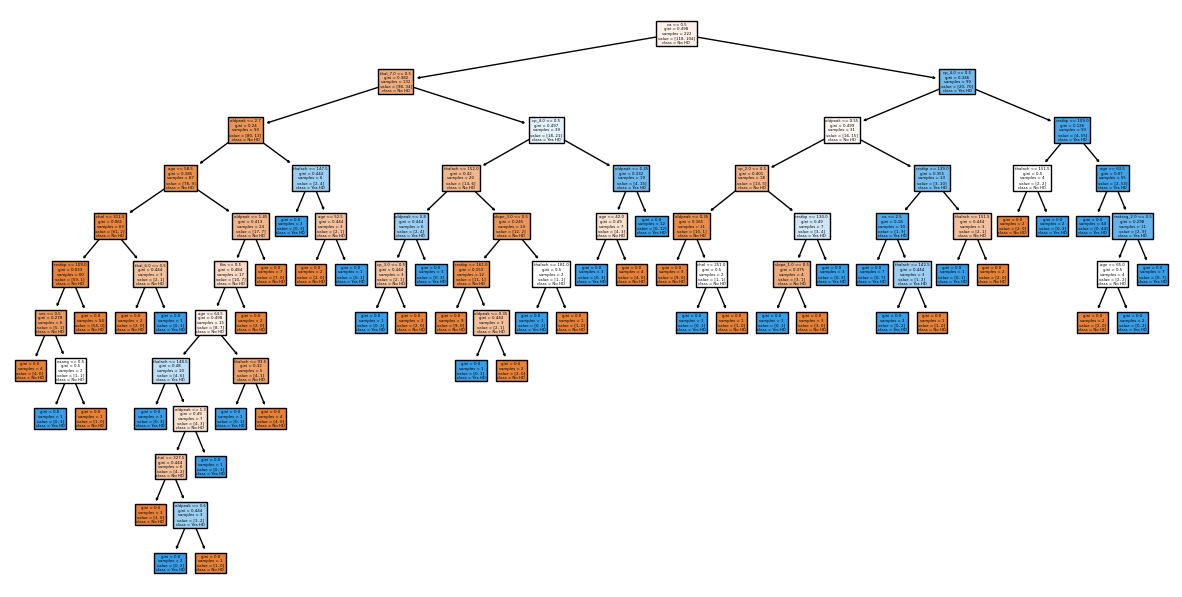

In [72]:
## The tree plot
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
          filled=True,
          class_names=["No HD","Yes HD"],
          feature_names=X_encoded.columns)

The preliminary decision tree can be seen above which is a huge tree that should be pruned for optimization. Now, trees preformance will be determined by examining the confusion matrix.

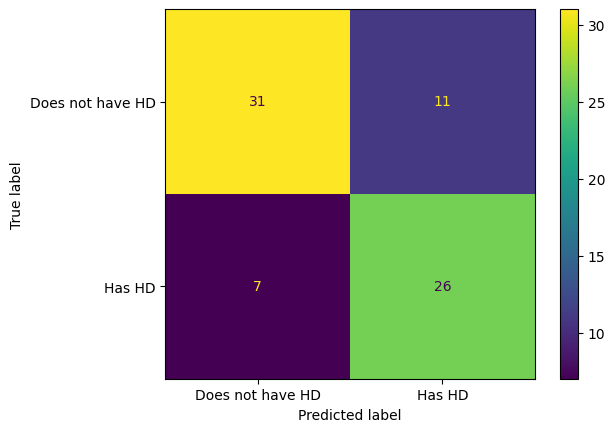

In [73]:
## Confusion Matrix
predictions = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Does not have HD","Has HD"])
disp.plot()
plt.show()

As it seen on the confusion matrix of the dt model, 31+11=42 people that did not have **Heart disease**, **31(%74)** were correctly classified. And of the 7+26=33 people that have **Heart disease**, **26(%79)** were correctly classified. Can the model predict better? Maybe the model might be holding back because of that it might have overfit the training set. Thus, in order to clarify this we can prune the three and see if it can do better.

# **Cost Complexity Pruning Part 1: Visualize Alpha**

Pruning a tree with cost complexity pruning can simplify the whole process of finding a smaller tree that improves the accuracy with the Testing Dataset.


Pruning a decision tree is all about finding the right value for the pruning parameter, alpha, which controls how little or how much pruning happens. One way to find optimal alpha value is to checking the plot of accuracy values of the tree for changing parameter.


First, extract different values of alpha that are available for this tree and build pruned tree for each alpha value.

In [74]:
path=clf_dt.cost_complexity_pruning_path(X_train,y_train) # determine values for alpha
ccp_alphas=path.ccp_alphas # extracting different values for alpha
ccp_alphas=ccp_alphas[:-1] #exclude maximum value for alpha, because the max value prune all leaves

clf_dts=[] # an array for decision trees to put in

## Creating a decision tree per value for alpha and storing it in the array
for ccp_alpha in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train,y_train)
  clf_dts.append(clf_dt)

Graphs of the accureacy of the trees using the **Training Dataset** and the **Testing Dataset** as a function of alpha.

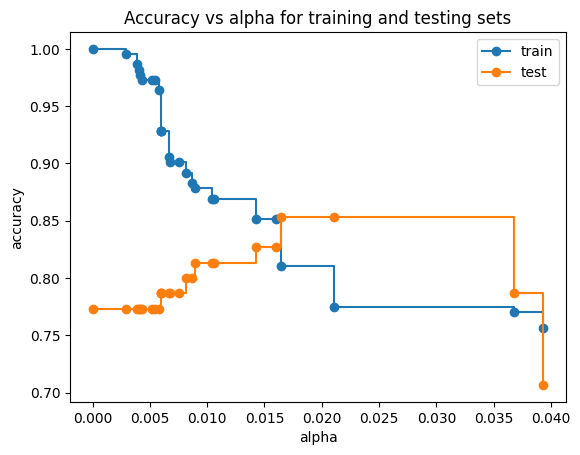

In [75]:
train_scores= [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig, ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

As it can be seen from the graph, the accuray for the Testing Dataset hit its maximum value when alpha is about **0.016**.Thus, the pruning makes the model accurray better.

Also, because of the fact that we dont know wether the best training set has been used or not, best training set can be found by implementing **10-Fold Cross Validation** in order to evaluate the model.It can be done using **cross_val_score()** function.

# **Cost Complexity Pruning Part 2: Cross Validation For Finding the Best Alpha**

For the previous graph suggested one value for alpha which is 0.016, but another set of data might suggest another optimal value.

First, the different training and test splits will be demonstrated using cross_val_score().


<Axes: xlabel='tree'>

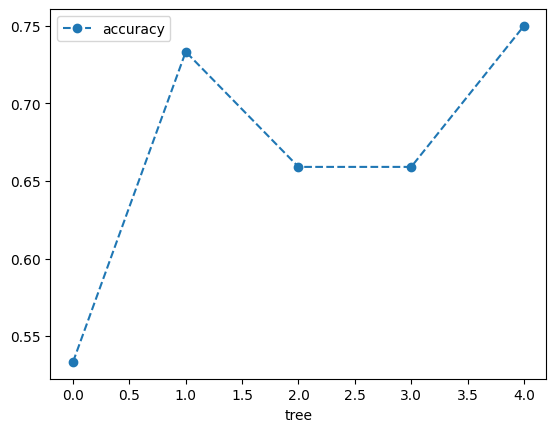

In [76]:
clt_dt=DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) # create a tree with ccp_alpha=0.016

# 5-fold cross validation creates 5 different training and testing splits
scores=cross_val_score(clf_dt,X_train, y_train, cv=5)
df=pd.DataFrame(data={'tree':range(5),
                      'accuracy': scores})
df.plot(x='tree',y='accuracy', marker='o', linestyle='--')

The fraph above shows the sensitivity of accuray for different kinds of Training and Testing data with the same alpha. Thus, the optimal ccp_alpha value can be found using cross validation .

<Axes: xlabel='alpha'>

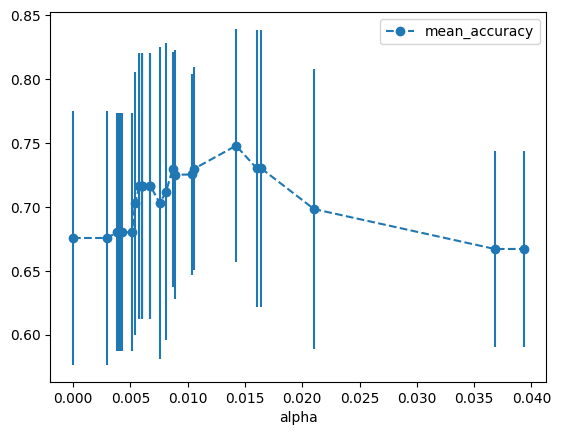

In [78]:
## Array to store the results of each cross validation
alpha_loop_values=[]

## Since, the dataset is small 5-fold cross validation should be enough
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## The standard deviation of the scores will be plotted for each candidate value for alpha
alpha_results=pd.DataFrame(alpha_loop_values,
                           columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')


As it can be seen from the graph, instead of using ccp_alpha=0.016, 0.0014 can be used because it has better accuray. The exact value can be found and stored with:

In [80]:
alpha_results[(alpha_results['alpha']>0.014)
              &
              (alpha_results['alpha']<0.015)
              ]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [85]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.014)
              &
              (alpha_results['alpha']<0.015)
              ]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

The stored value is series which is a array type and it can be converted as an float.

In [86]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

Thus, the ideal_ccp_alpha value is the most optimal value for the dt model.

#**Building, Evaluating, Drawing, and Interpreting the Final Classification Tree**

Final classification tree can be drawn by simply setting `ccp_alpha=ideal_ccp_alpha`.

In [87]:
clt_dt_pruned=DecisionTreeClassifier(random_state=42,
                                     ccp_alpha=ideal_ccp_alpha)
clt_dt_pruned=clt_dt_pruned.fit(X_train, y_train)

Now, let's see the pruned tree performance from a confusion matrix.

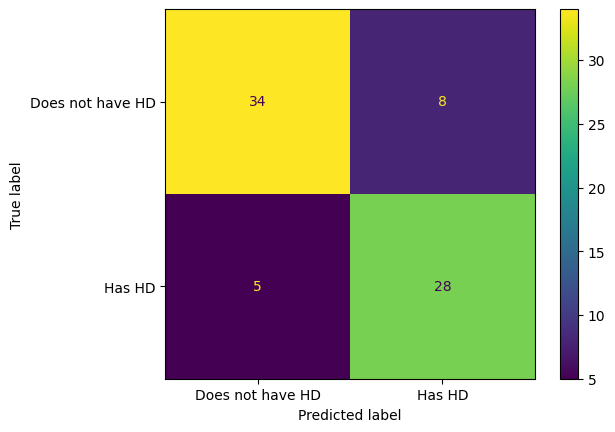

In [88]:
predictions = clt_dt_pruned.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clt_dt_pruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Does not have HD","Has HD"])
disp.plot()
plt.show()

As it can be seen from the confusion matrix, of the **34+8=42** people that did not have heart disease, **34(%81)** were correctly classified. Thus, the improvement over the full sized tree is **7%** (old accuracy was %74). Of the **5+28=33** people with heart disease, **28(85%)** were correctly classified which is **6%** more than the old accuracy score (79%).

The last thing is to draw the pruned tree.

[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(0.46153846153846156, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(0.8461538461538461, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(0.7692307692307693, 0.375, 'oldpeak <= 0.5

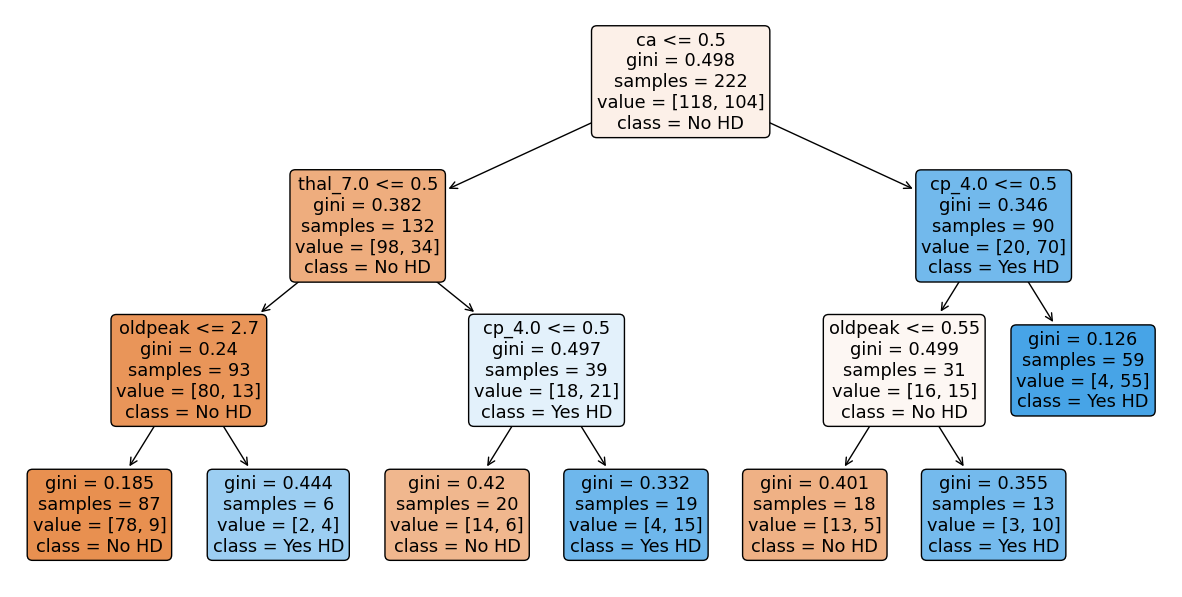

In [90]:
plt.figure(figsize=(15,7.5))
plot_tree(clt_dt_pruned,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns)

The new classification tree much more complex than the first one because of the efficient optimization on it. This tree is doing a great job classifying the data because the first tree were overfits the data.